In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


View the summary of the dataset

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Check data types of columns of data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Identify Missing values, NAN in variables

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Check the distribution of variables using histograms

In [8]:
df_hist = df.select_dtypes(include='number')
df_hist=df_hist.drop(columns='Id',axis=1)


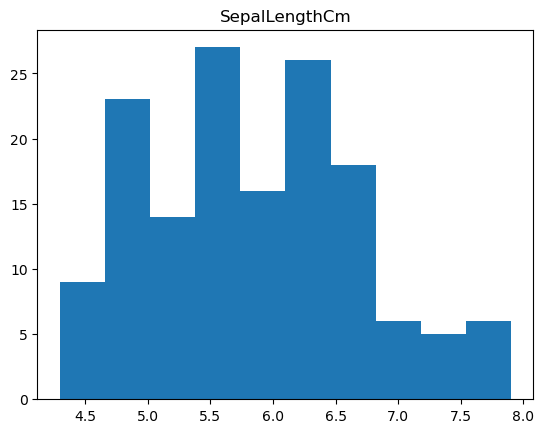

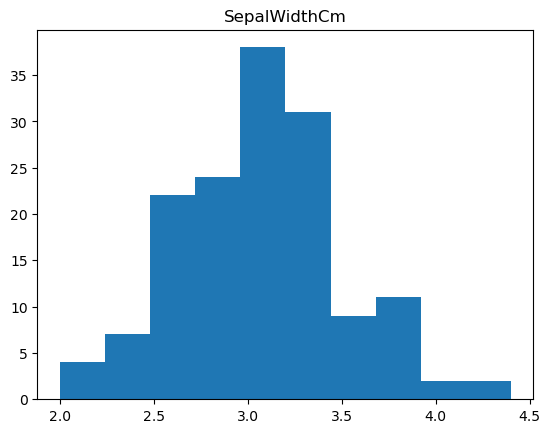

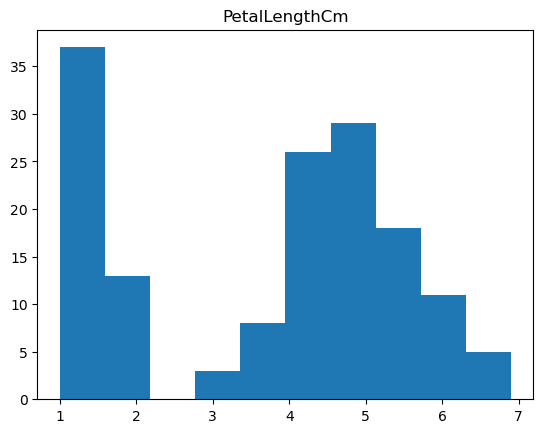

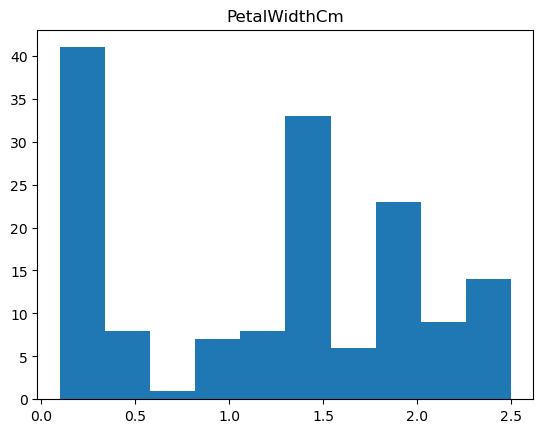

In [9]:
for col in df_hist.columns:
    plt.hist(df_hist[col])
    plt.title(col)
    plt.show()

In [10]:
df_hist.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

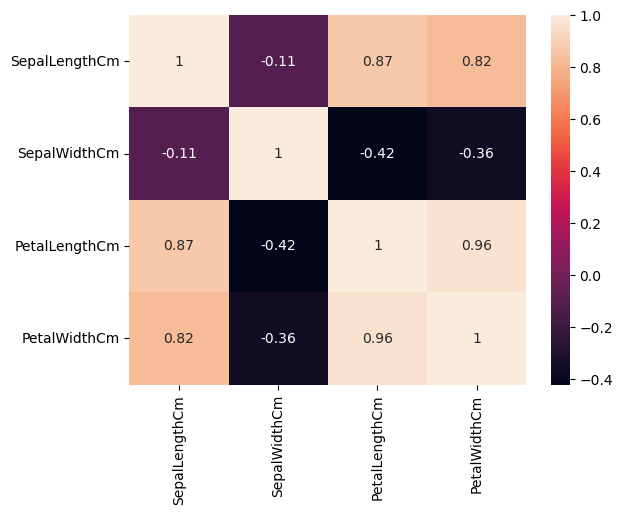

In [11]:
sns.heatmap(df_hist.corr(),annot=True)

In [12]:
x=df[['PetalLengthCm','PetalWidthCm','SepalLengthCm']]
y=df['Species']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) 

In [14]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [15]:
k = 3
predictions = []

for test_instance in x_test.values:
    distances = [(i, euclidean_distance(train_instance, test_instance)) for i, train_instance in enumerate(x_train.values)]
    distances = sorted(distances, key=lambda x: x[1])
    neighbors_indices = [index for index, _ in distances[:k]]
    neighbors_labels = y_train.iloc[neighbors_indices]
    unique_labels, counts = np.unique(neighbors_labels, return_counts=True)
    predicted_class = unique_labels[np.argmax(counts)]
    predictions.append(predicted_class)


Check the accuracy score

In [19]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy using manual KNN: {accuracy:.2f}")

Accuracy using manual KNN: 0.98


Display confusion matrix

In [23]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix for k=3:")
print(cm)

Confusion Matrix for k=3:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Generate classification report

In [24]:
report = classification_report(y_test, predictions)
print("Classification Report for k=3:")
print(report)

Classification Report for k=3:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Evaluate classification error

In [26]:
classification_error = 1 - accuracy_score(y_test, predictions)
print("Classification Error:", classification_error)


Classification Error: 0.022222222222222254


Generate ROC curve and ROC AUC score.

In [ ]:
k_fold = 5
cv_scores = cross_val_score(model, x, y, cv=k_fold, scoring='accuracy')

print(f'Cross-Validation Scores (k={k_fold}):', cv_scores)
print(f'Mean Accuracy: {cv_scores.mean():.2f}')